# Linear regression with a perceptron

This notebook illustrates a 2-variable linear regression using:

* the direct linear regression from scikit-learn
* a perceptron coded in Keras

## Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns; sns.set()

import tensorflow as tf
from tensorflow import keras

from sklearn import linear_model

## Create sample and test datasets

We create data with the random functions from numpy. On the plot below, the small blue dots are the data used for training; the big red dots are the data used for testing the model at the end.

We want to make a linear regression, that is, design a linear model that predicts a value of $y$ given a value of $x$.

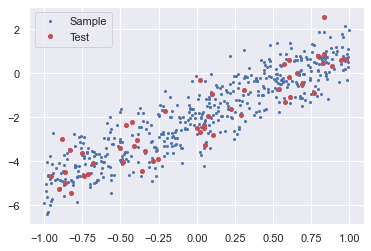

In [2]:
m, p, sig = 3, -2, 0.8
N, Ntest = 500, 50
X, Xtest = np.random.random(N)*2-1, np.random.random(Ntest)*2-1
Y, Ytest = m * X + p + sig * np.random.randn(N), m * Xtest + p + sig * np.random.randn(Ntest)
plt.plot(X, Y, 'o', markersize=2, label="Sample")
plt.plot(Xtest, Ytest, 'ro', markersize=4, label="Test")
plt.legend()

## Direct regression with scikit-learn

```expand_dims``` adds a dimension to fit scikit-learn requirements

### Build and train model

In [3]:
reg = linear_model.LinearRegression()
reg.fit(np.expand_dims(X, 1), np.expand_dims(Y, 1))

LinearRegression()

### Predict test data

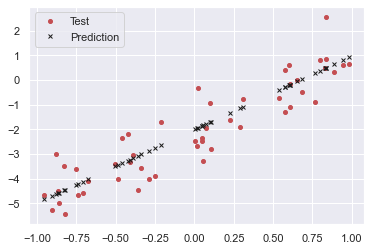

In [4]:
Ypred_lr = reg.predict(np.expand_dims(Xtest, 1))

plt.plot(Xtest, Ytest, 'ro', markersize=4, label="Test")
plt.plot(Xtest, Ypred_lr, 'kx', markersize=4, label="Prediction")
plt.legend()

## Perceptron with Keras

### Create model

We create a perceptron with Keras. It is a sequential model with 1 layer, 1 output variable (first argument of ```Dense```) and 2 trainable parameters (slope and bias of the regression).

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(1, input_shape=(1,)))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### Split sample into training and validation dataset

We split the data available for training into training and validation datasets.

In [6]:
Nval = 50
Ntrain = N - Nval
permut = np.random.permutation(range(N))
ival, itrain = permut[:Nval], permut[Nval:]
Xval, Yval = X[ival], Y[ival]
Xtrain, Ytrain = X[itrain], Y[itrain]

# The following lines are not necessary for fitting. 
#Xval = np.expand_dims(Xval,1)
#Yval = np.expand_dims(Yval,1)
#Xtrain = np.expand_dims(Xtrain,1)
#Ytrain = np.expand_dims(Ytrain,1)

### Train model

In [7]:
model.fit(Xtrain, Ytrain, \
          epochs = 500,
          verbose = 0,
          validation_data = (Xval, Yval))

### Prediction with test dataset


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



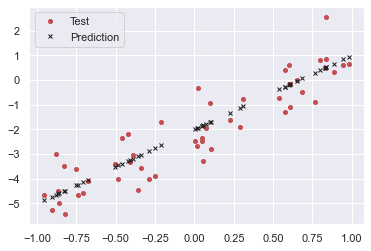

In [8]:
Ypred = model(np.expand_dims(Xtest, 1))

plt.plot(Xtest, Ytest, 'ro', markersize=4, label="Test")
plt.plot(Xtest, Ypred, 'kx', markersize=4, label="Prediction")
plt.legend()

### A look at weights

In [9]:
model.get_weights()

[array([[3.0154722]], dtype=float32), array([-2.004105], dtype=float32)]

In [11]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[3.0154722]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([-2.004105], dtype=float32)>]